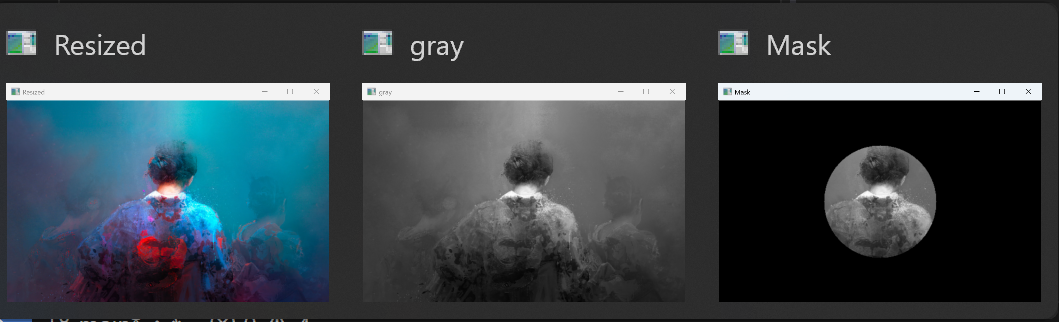
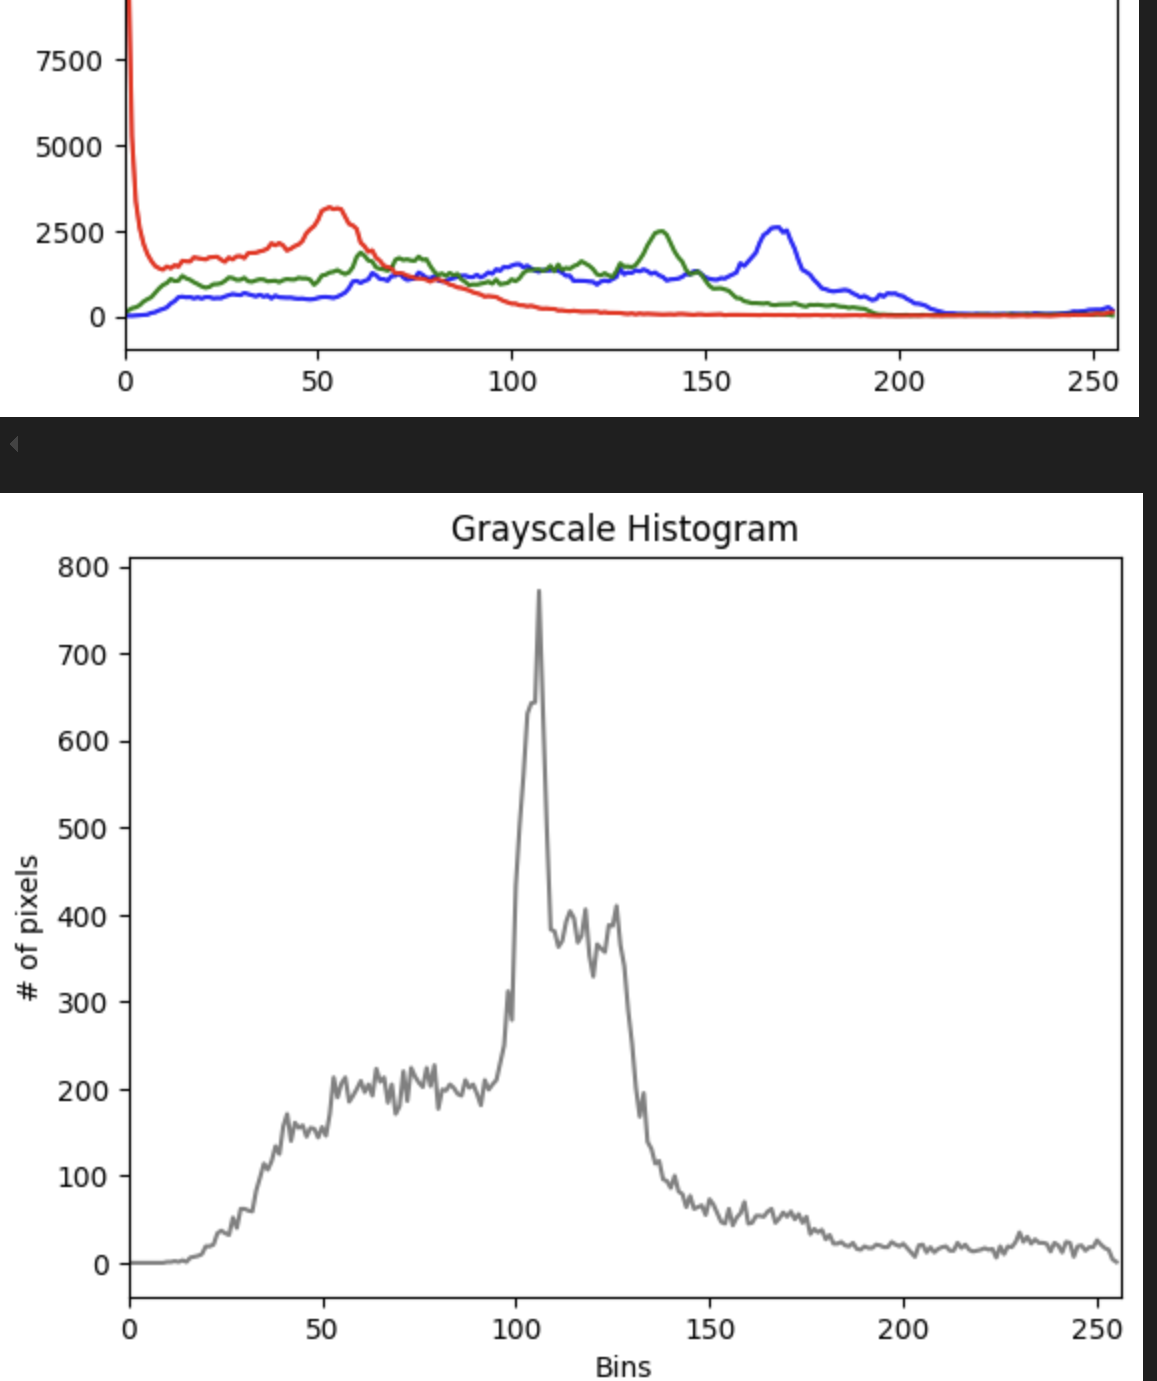
- 绘制直方图 (Histogram)
  - 灰色和三色直方图
- cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
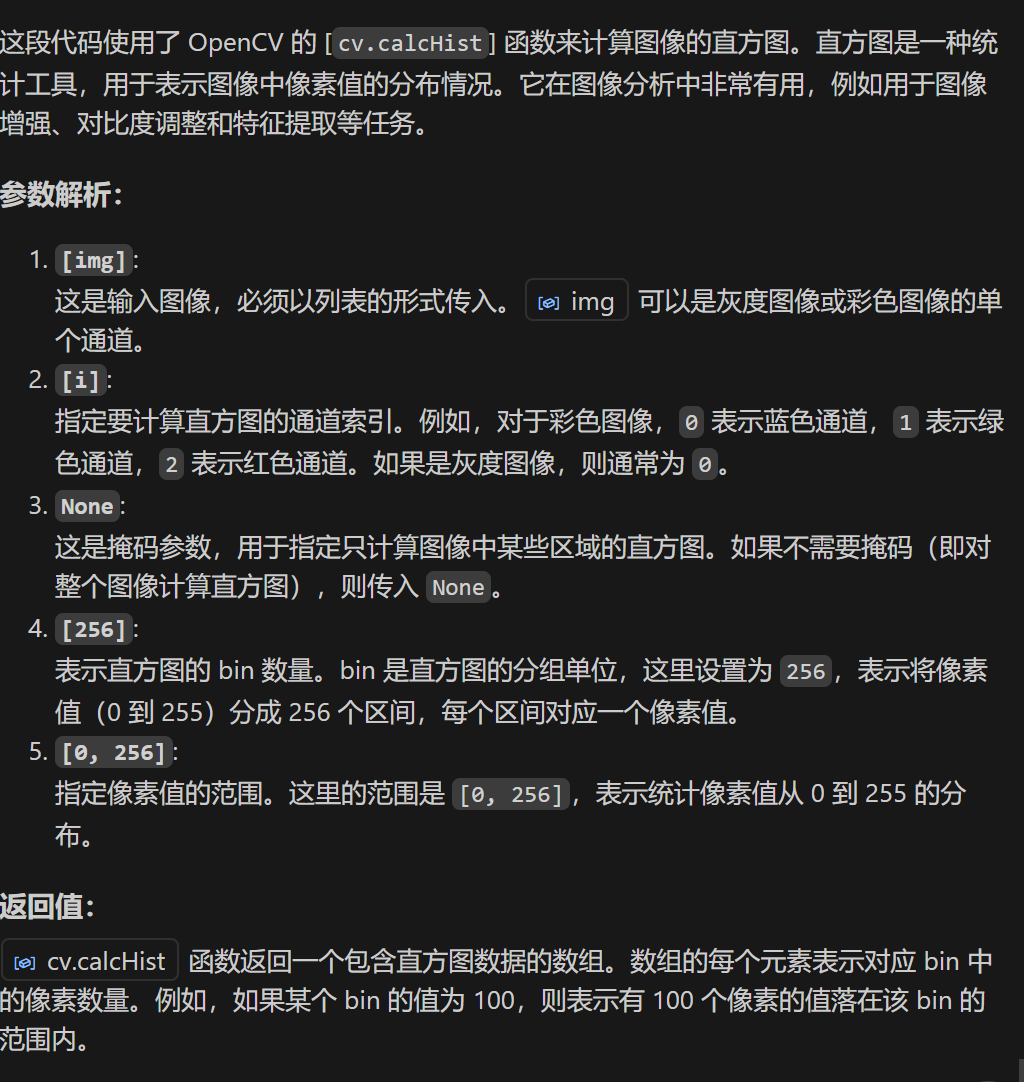


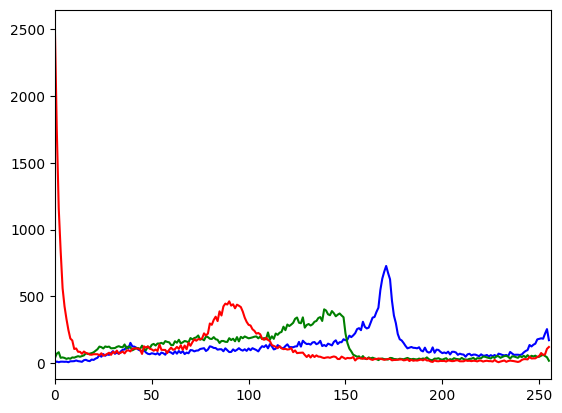

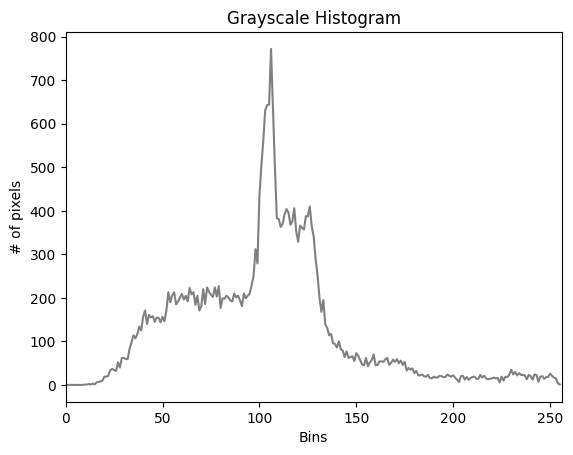

In [9]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread("Photos/3.png")
# cv.imshow("image", img)
# resize 缩放
resized = cv.resize(img, None, fx=0.2, fy=0.2)
cv.imshow("Resized", resized)
img = resized

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("gray", gray)

# 增加Mask，计算指定Mask区域的直方图
blank = np.zeros(img.shape[:2], dtype="uint8")
circle = cv.circle(
    blank, (img.shape[1] // 2, img.shape[0] // 2), 100, 255, thickness=-1
)
mask = cv.bitwise_and(gray, gray, mask=circle)
cv.imshow("Mask", mask)
# gray histogram
gray_hist = cv.calcHist([gray], [0], mask, [256], [0, 256])

# color histogram
colors = ("b", "g", "r")
for i, col in enumerate(colors):
    hist = cv.calcHist(
        [img], [i], mask, [256], [0, 256]
    )  # 计算直方图，传入图像、通道、掩码、bins数量和范围
    plt.plot(hist, color=col)
    plt.xlim([0, 256])  # x轴范围限定在0-256之间


plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.plot(gray_hist, color="gray")
plt.xlim([0, 256])

cv.waitKey(0)
cv.destroyAllWindows()